# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
clustered_data = pd.read_csv('./data/clustered_data.csv')
clustered_data

,nationality,position,overall,age,hits,potential,team,class
0,118,19,71,29,0,71,212,0
1,41,39,71,35,0,71,365,0
2,17,48,71,28,0,71,450,0
3,4,22,71,30,0,71,296,0
4,77,7,71,27,0,71,470,0
...,...,...,...,...,...,...,...,...
17976,128,39,66,19,38,86,135,2
17977,153,77,66,17,36,86,89,2
17978,44,157,64,17,45,85,127,2
17979,44,157,64,17,47,87,417,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
X = clustered_data.drop(columns=['class'])
y = clustered_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
len(X_train)

14384

In [18]:
len(X_test)

3597

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [56]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
print("Training selesai.")

Training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [54]:
y_pred = dt.predict(X_test)
print('Hasil dengan algoritma DecisionTree')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="micro")}')

Hasil dengan algoritma DecisionTree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [58]:
y_pred_knn = knn.predict(X_test)
print('Hasil dengan algoritma KNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_knn, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred_knn, average="micro")}')
print(f'F1-Score: {f1_score(y_test, y_pred_knn, average="micro")}')

Hasil dengan algoritma KNN
Accuracy: 0.7856547122602169
Precision: 0.7856547122602169
Recall: 0.7856547122602169
F1-Score: 0.7856547122602169


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Dikarenakan Decision Tree mendapatkan hasil yang sempurna, maka akan mencoba pake gridsearch untuk model KNN
knn = KNeighborsClassifier()
range_search = list(range(1, 10))
param_grid = dict(n_neighbors = range_search) # Coba sampai n-10

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
print('Pencarian selesai')

Pencarian selesai


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [75]:
mean_score = grid.cv_results_['mean_test_score']
mean_score

array([0.77474994, 0.73234122, 0.770509  , 0.74165769, 0.76564231,
       0.74117092, 0.76160997, 0.74617655, 0.7583426 ])

Text(0, 0.5, 'Accuracy')

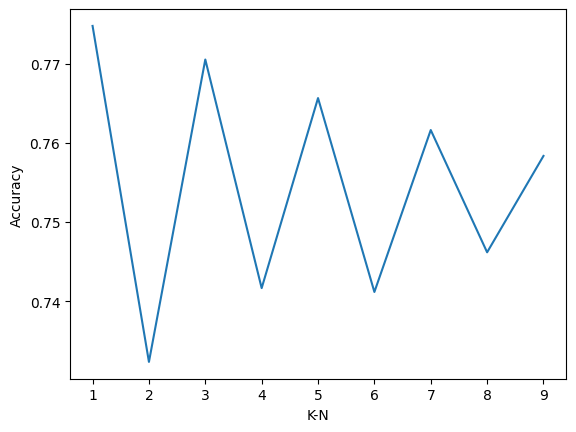

In [76]:
plt.plot(range_search, mean_score)
plt.xlabel('K-N')
plt.ylabel('Accuracy')

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### Hasil Analisis menggunakan DecisionTree
- Dalam kasus ini untuk mengklasifikasikan player menggunakan model DecisionTree adalah yang terbaik, dikarenakan DecisionTree sendiri seperti pohon dan dalam kasus ini sangat sempurna untuk data set test.
### Hasil Analisis menggunakan KNN
- KNN model klasifikasi yang kurang baik performanya di kasus ini, dimana jika dilihat dari cara kerja KNN yang memanfaatkan neighbor ini tidak optimal.
- Setelah di tuning menggunakan GridSearch tidak ada hasil yang signifikan.
### Kesimpulan
- DecisionTree adalah model yang terbaik untuk kasus ini dimana kita akan mengklasifikasikan player berdasarkan kelasnya, dan kita juga bisa menggunakan versi lanjut dari DecisionTree yaitu RandomForest namun saya rasa dengan DecisiionTree sudah cukup.